In [1]:
import pandas as pd
import numpy as np
import warnings 
import warnings
import seaborn as sns
from seaborn import pairplot
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import datasets, linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as smd
from scipy import stats
import scipy.stats
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from statsmodels.discrete.discrete_model import Probit
from sklearn. model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

warnings.filterwarnings('ignore')

### Установим дефолтные настройки
### У графиков параметры цвета, размера, шрифта
### Можно положить их в словарь дефолтных настроек

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 15
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 15
mlp.rcParams['xtick.color'] = '#008080'

mlp.rcParams['ytick.major.size'] = 15
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 15
mlp.rcParams['ytick.color'] = '#808080'

mlp.rcParams['axes.labelsize'] = 15
mlp.rcParams['axes.titlesize'] = 15
mlp.rcParams['axes.titlecolor'] = '#0343DF'
mlp.rcParams['axes.labelcolor'] = '#000000'

C:\Users\79289\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\79289\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
data = pd.read_csv('SPACS1 (1).csv')

In [3]:
data.head()

,SPACK,Ticker,Merger,Up-Front UW fee,Deferred UW fee,Number of underwriters,CEO's age,"IPO Proceeds, $M",IPO Sector,IPO Geography,BCMA,Team,Age of the team
0,Counter Press,CPAQ,0,2.0,3.5,2.0,52.0,86.25,Media & Entertainment,Global,0,5.0,51.000000
1,Crypto 1 Acq,DAOO,0,2.0,3.5,1.0,38.0,230.00,Financial,Global,0,8.0,55.000000
2,Arena Fortify,AFAC,0,2.0,3.5,2.0,50.0,172.50,Materials,Global,1,6.0,48.833333
3,Hunt Companies Acq Corp. I,HTAQ,0,2.0,3.5,1.0,51.0,230.00,Energy,Global,0,7.0,63.142857
4,McLaren Technology,MLAI,0,2.0,3.5,1.0,53.0,201.25,Financial,Global,0,8.0,50.875000


In [4]:
data.value_counts('Merger')

Merger
1    203
0    115
dtype: int64

In [5]:
#Проверим наличие пропусков в данных 
nans = np.sum(data.isna(), axis=0) 
nans

SPACK                      0
Ticker                     0
Merger                     0
Up-Front UW fee            0
Deferred UW fee            0
Number of underwriters     2
CEO's age                 13
IPO Proceeds, $M           2
IPO Sector                 2
IPO Geography              0
BCMA                       0
Team                       3
Age of the team            3
dtype: int64

In [6]:
data.dropna(subset = ['IPO Sector'], inplace=True) #удалим пропуски из колонки IPO Sector

In [7]:
data.dropna(subset = ["CEO's age"], inplace=True) #удалим пропуски из колонки CEO's age

In [8]:
data.dropna(subset = ["Team"], inplace=True) #удалим пропуски из колонки Team

In [9]:
data.isna().sum() #убедимся, что пропусков не осталось 

SPACK                     0
Ticker                    0
Merger                    0
Up-Front UW fee           0
Deferred UW fee           0
Number of underwriters    0
CEO's age                 0
IPO Proceeds, $M          0
IPO Sector                0
IPO Geography             0
BCMA                      0
Team                      0
Age of the team           0
dtype: int64

In [10]:
data = data.drop(['SPACK', 'Ticker'], axis=1) #удалим колонки с названиями компаний, так как они нам не понадобятся 

In [11]:
# Посмотрим на категориальные колонки 
categorical_columns = data.loc[:,data.dtypes==np.object].columns 
categorical_columns

Index(['IPO Sector', 'IPO Geography'], dtype='object')

In [12]:
data.value_counts('Merger')

Merger
1    192
0    111
dtype: int64

In [13]:
### Посмотрим на некатегориальные колонки
numeric_columns = data.loc[:,data.dtypes!=np.object].columns
data.loc[:,data.dtypes!=np.object].head(2)

,Merger,Up-Front UW fee,Deferred UW fee,Number of underwriters,CEO's age,"IPO Proceeds, $M",BCMA,Team,Age of the team
0,0,2.0,3.5,2.0,52.0,86.25,0,5.0,51.0
1,0,2.0,3.5,1.0,38.0,230.00,0,8.0,55.0


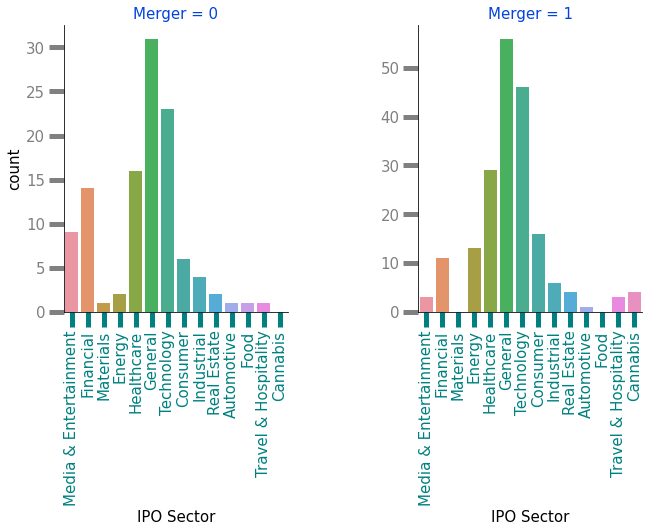

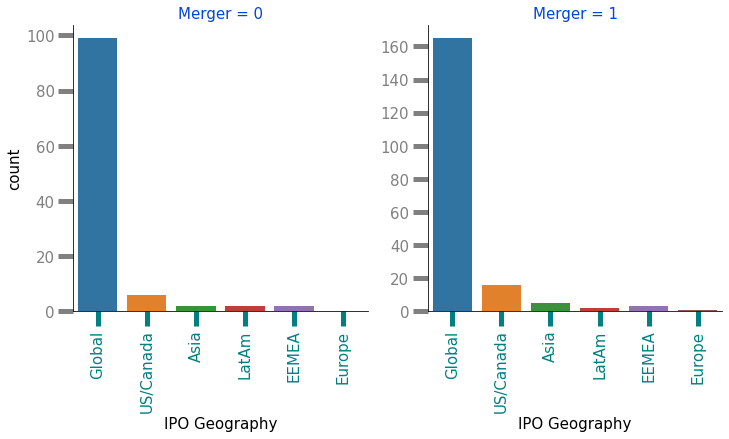

In [14]:
#посмотрим на распределение компаний по слиянию\ликвидации по секторам и регионам 
for col in categorical_columns:
    g = sns.catplot(x=col, kind='count', col='Merger', data=data, sharey=False)
    g.set_xticklabels(rotation=90)

In [15]:
## Посмотрим на описательную статистику 
round(data.describe(),2)

,Merger,Up-Front UW fee,Deferred UW fee,Number of underwriters,CEO's age,"IPO Proceeds, $M",BCMA,Team,Age of the team
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,0.63,1.97,3.46,2.25,51.44,308.46,0.13,6.60,52.96
std,0.48,0.36,0.44,1.51,8.69,307.32,0.33,1.84,5.81
min,0.00,0.00,0.00,1.00,32.00,46.00,0.00,2.00,37.50
25%,0.00,2.00,3.50,1.00,45.00,173.75,0.00,5.00,48.94
50%,1.00,2.00,3.50,2.00,51.00,250.00,0.00,6.00,53.50
75%,1.00,2.00,3.50,3.00,58.00,345.00,0.00,8.00,57.18
max,1.00,5.82,5.50,13.00,74.00,4000.00,1.00,13.00,66.50


In [16]:
# Построим корреляционную матрицу
round(data.corr(),2)

,Merger,Up-Front UW fee,Deferred UW fee,Number of underwriters,CEO's age,"IPO Proceeds, $M",BCMA,Team,Age of the team
Merger,1.00,0.00,-0.05,0.02,0.05,-0.11,0.16,-0.06,-0.04
Up-Front UW fee,0.00,1.00,0.18,-0.06,0.08,-0.14,0.11,-0.06,0.01
Deferred UW fee,-0.05,0.18,1.00,-0.09,0.01,-0.13,0.06,0.09,-0.04
Number of underwriters,0.02,-0.06,-0.09,1.00,0.09,0.39,0.02,-0.06,0.11
CEO's age,0.05,0.08,0.01,0.09,1.00,0.07,0.09,-0.02,0.37
"IPO Proceeds, $M",-0.11,-0.14,-0.13,0.39,0.07,1.00,-0.13,0.00,0.10
BCMA,0.16,0.11,0.06,0.02,0.09,-0.13,1.00,-0.02,-0.04
Team,-0.06,-0.06,0.09,-0.06,-0.02,0.00,-0.02,1.00,0.05
Age of the team,-0.04,0.01,-0.04,0.11,0.37,0.10,-0.04,0.05,1.00


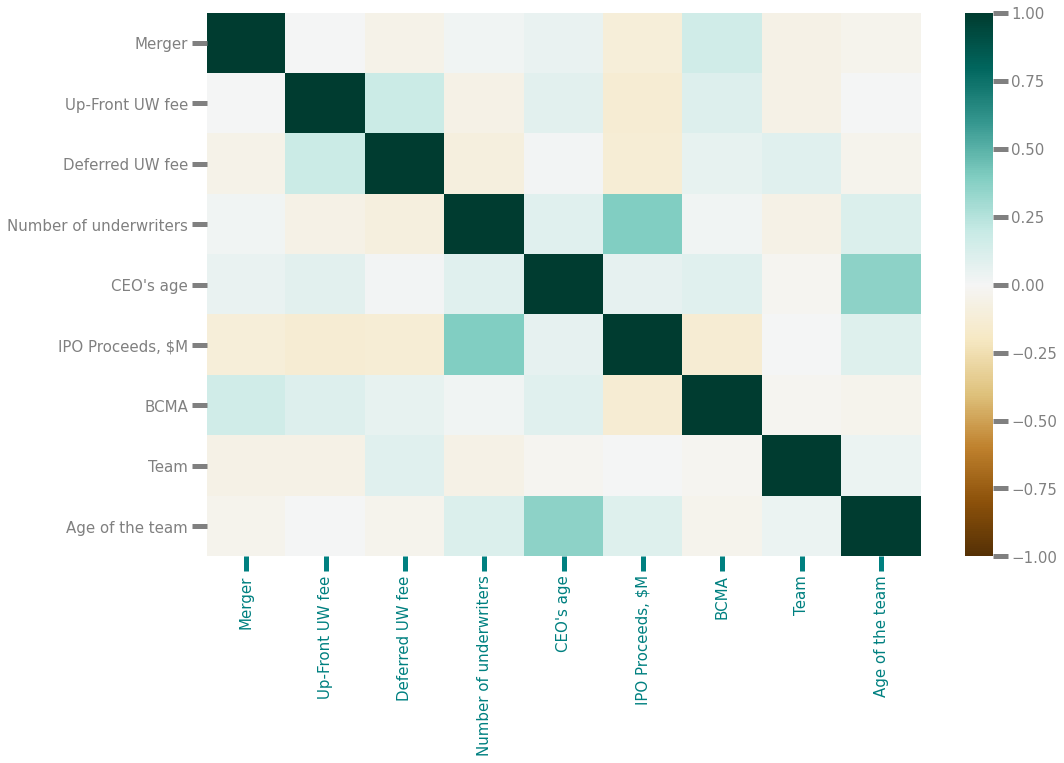

In [17]:
### Изобразим в виде Тепловой карты
fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(data.corr(), 
            xticklabels=numeric_columns,
            yticklabels=numeric_columns,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

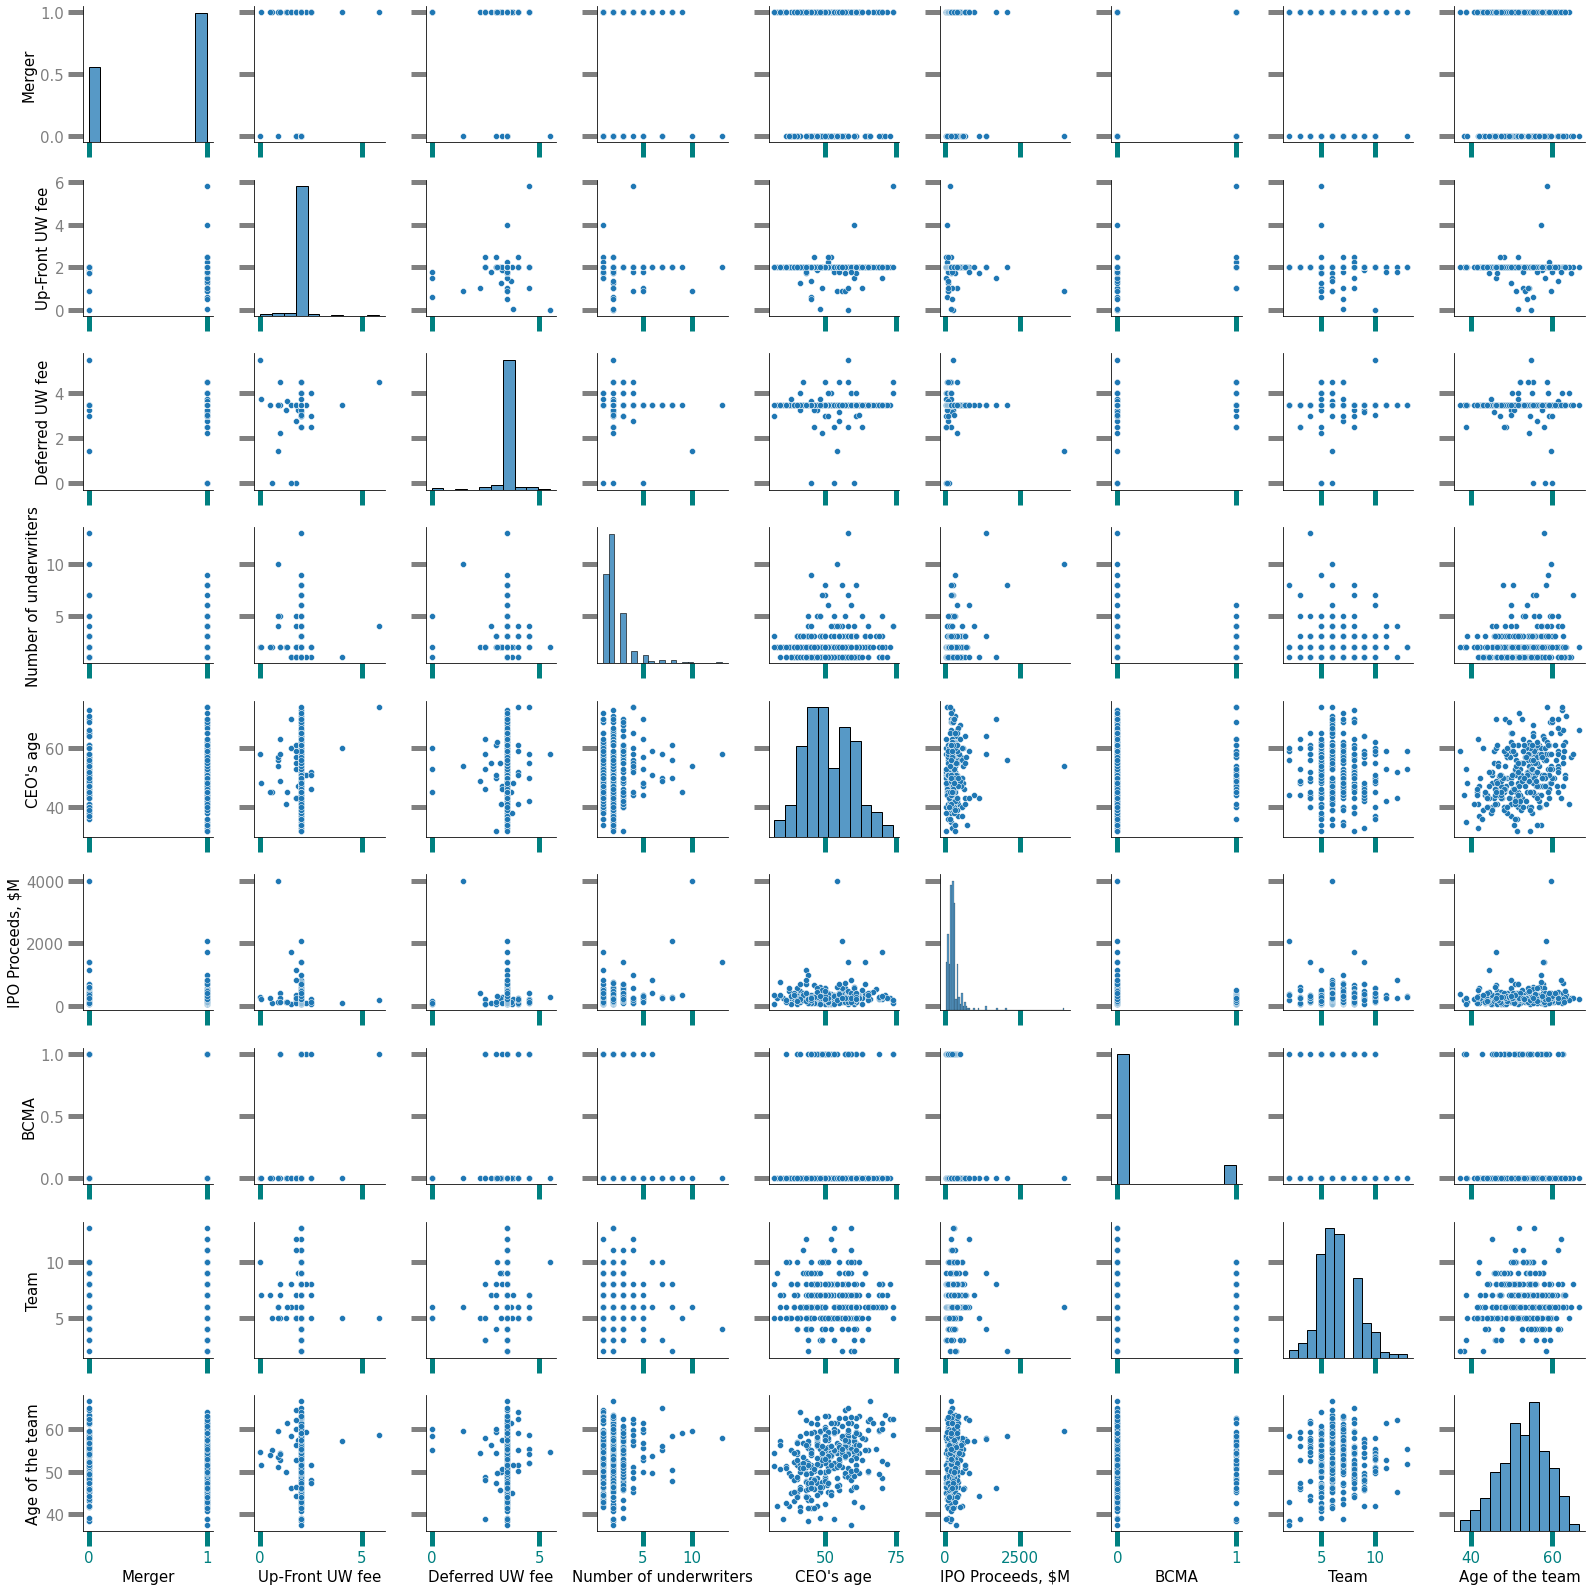

In [184]:
#Изобразим графики разброса
pairplot(data)

In [18]:
#Посмотрим на самые большие корреляции 
def get_redundant_pairs(data):
    pairs_to_drop = set()
    cols = data.columns
    for i in range(0, data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data[numeric_columns], 10))

Top Absolute Correlations
Number of underwriters  IPO Proceeds, $M    0.390967
CEO's age               Age of the team     0.366711
Up-Front UW fee         Deferred UW fee     0.183475
Merger                  BCMA                0.163827
Up-Front UW fee         IPO Proceeds, $M    0.140327
IPO Proceeds, $M        BCMA                0.134221
Deferred UW fee         IPO Proceeds, $M    0.125466
Merger                  IPO Proceeds, $M    0.112173
Number of underwriters  Age of the team     0.111827
Up-Front UW fee         BCMA                0.105010
dtype: float64


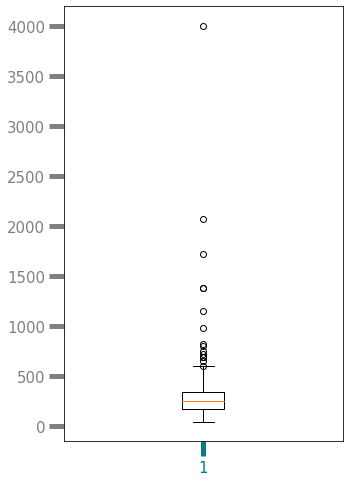

In [19]:
### Нарисуем коробчатую диаграмму для Размера IPO (млн долл.)
fig = plt.figure()
fig.set_size_inches((5, 8))
plt.boxplot(data['IPO Proceeds, $M'].values)
plt.show()

In [20]:
### Уберем все данные, в которых значение больше 3000, чтобы избавиться от верхнего выброса 
data=data[data['IPO Proceeds, $M']<3000]

In [21]:
data.value_counts('IPO Proceeds, $M')

IPO Proceeds, $M
230.00     29
345.00     23
250.00     18
276.00     13
172.50     13
           ..
206.50      1
203.95      1
200.40      1
170.00      1
2070.00     1
Length: 113, dtype: int64

In [22]:
data1=data.copy() # *Понадобится для проверки значимости уравнения*

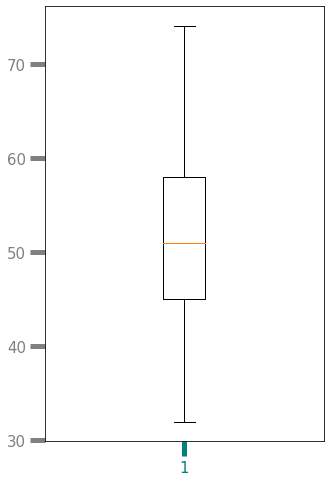

In [23]:
### Нарисуем коробчатую диаграмму для Возраста гендиректора
fig = plt.figure()
fig.set_size_inches((5, 8))
plt.boxplot(data["CEO's age"].values)
plt.show()

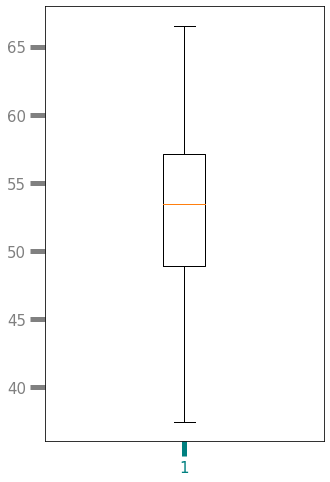

In [24]:
### Нарисуем коробчатую диаграмму для Среднего возраста команды 
fig = plt.figure()
fig.set_size_inches((5, 8))
plt.boxplot(data['Age of the team'].values)
plt.show()

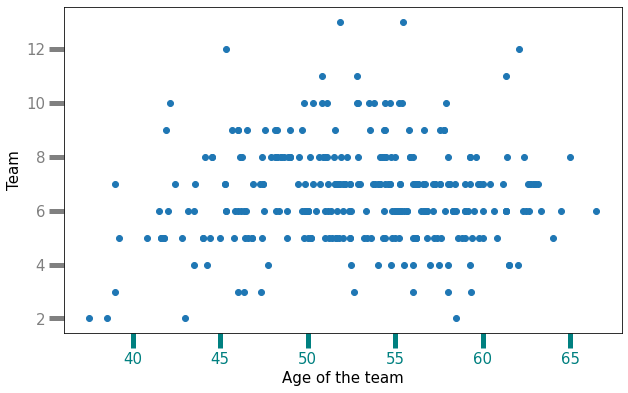

In [25]:
#Нарисуем график разброса между размером команды и ее средним возрастом 
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['Age of the team'], y = data['Team'])
plt.xlabel("Age of the team")
plt.ylabel("Team")

plt.show()

In [26]:
### Преобразуем категориальные колонки с помощью OneHotEncoding
for col in categorical_columns:
    one_hot = pd.get_dummies(data[col], prefix=col, drop_first=True)
    data = pd.concat((data.drop(col, axis=1), one_hot), axis=1) 

In [27]:
#Построим линейную регресссию
X = data.drop('Merger', axis=1)
y = data["Merger"]

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-3.68471608e-02 -1.00549786e-01  7.94491351e-03  3.46861859e-03
 -1.48329591e-04  2.47460941e-01 -1.15698353e-03 -4.09727890e-03
  5.47842942e-01  3.03596910e-01  4.40971867e-01  2.99663995e-02
 -3.89742836e-01  2.34283395e-01  2.00635677e-01  1.98186251e-01
 -6.60111741e-01 -1.46657125e-01  2.45674346e-01  2.70397204e-01
  3.54477328e-01 -1.88456267e-01 -1.50724940e-01 -8.80245186e-02
 -4.37131256e-01 -5.52016826e-02]
Intercept: 0.9695856775011509
R^2 score: 0.12593168558093393


In [28]:
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Merger   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     1.524
Date:                Sun, 02 Apr 2023   Prob (F-statistic):             0.0532
Time:                        23:56:51   Log-Likelihood:                -187.30
No. Observations:                 302   AIC:                             428.6
Df Residuals:                     275   BIC:                             528.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.9696      0.559      1.734      0.084      -0.131       2.070
Up-Front UW fee                     -0.0368      0.079     -0.464      0.643      -0.193       0.119
Deferred UW fee                     -0.1005      0.066     -1.517      0.130      -0.231       0.030
Number of underwriters               0.0079      0.020      0.390      0.697      -0.032       0.048
CEO's age                            0.0035      0.003      1.000      0.318      -0.003       0.010
IPO Proceeds, $M                    -0.0001      0.000     -1.093      0.275      -0.000       0.000
BCMA                                 0.2475      0.090      2.735      0.007       0.069       0.426
Team                                -0.0012      0.016     -0.072      0.942      -0.033       0.030
Age of the team                     -0.0041      0.005     -0.794      0.428      -0.014       0.006
IPO Sector_Cannabis                  0.5478      0.417      1.313      0.190      -0.273       1.369
IPO Sector_Consumer                  0.3036      0.357      0.849      0.396      -0.400       1.007
IPO Sector_Energy                    0.4410      0.364      1.213      0.226      -0.275       1.157
IPO Sector_Financial                 0.0300      0.352      0.085      0.932      -0.664       0.724
IPO Sector_Food                     -0.3897      0.588     -0.663      0.508      -1.547       0.767
IPO Sector_General                   0.2343      0.345      0.679      0.498      -0.445       0.913
IPO Sector_Healthcare                0.2006      0.351      0.572      0.568      -0.489       0.891
IPO Sector_Industrial                0.1982      0.374      0.531      0.596      -0.537       0.934
IPO Sector_Materials                -0.6601      0.585     -1.129      0.260      -1.811       0.491
IPO Sector_Media & Entertainment    -0.1467      0.366     -0.401      0.689      -0.868       0.574
IPO Sector_Real Estate               0.2457      0.395      0.621      0.535      -0.533       1.024
IPO Sector_Technology                0.2704      0.347      0.780      0.436      -0.412       0.953
IPO Sector_Travel & Hospitality      0.3545      0.414      0.856      0.393      -0.461       1.170
IPO Geography_EEMEA                 -0.1885      0.282     -0.669      0.504      -0.743       0.366
IPO Geography_Europe                -0.1507      0.537     -0.281      0.779      -1.207       0.906
IPO Geography_Global                -0.0880      0.192     -0.458      0.647      -0.466       0.290
IPO Geography_LatAm                 -0.4371      0.309     -1.413      0.159      -1.046       0.172
IPO Geography_US/Canada             -0.0552      0.217     -0.254      0.799      -0.483       0.372
=====================================================

In [29]:
#Проведем тест Рамсея на спецификацию
X = data.drop('Merger', axis=1)
y = data["Merger"] 
X = sm.add_constant(X)
mlr=sm.OLS(y,X).fit()
resettest = smd.linear_reset(res=mlr, power=2, test_type="fitted", use_f=True)

print(resettest)


<F test: F=array([[0.80028506]]), p=0.3717932957512847, df_denom=274, df_num=1>


Так как p-value больше любого адекватного уровня значимости, то основная гипотеза о правильной спецификации исходной модели не принимается.
Таким образом, неообходимо построение нелинейных моделей

In [30]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [31]:
#Проверим равенство ранга матрицы и количества фичей, так как они равны, линейная зависимость, вызывающая строгую м\к отсутствует 
rank=np.linalg.matrix_rank(X)
num_features = X.shape[1]
print(f"В модели всего фичей: {num_features}, - а ранг равен {rank}")

В модели всего фичей: 27, - а ранг равен 27


In [32]:
#Проверим коэффициенты VIF для обнаружения мультиколлинеарности 
X = data.drop('Merger', axis=1)
y = data["Merger"]
X_constant = sm.add_constant(X)
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Up-Front UW fee,Deferred UW fee,Number of underwriters,CEO's age,"IPO Proceeds, $M",BCMA,Team,Age of the team,IPO Sector_Cannabis,IPO Sector_Consumer,IPO Sector_Energy,IPO Sector_Financial,IPO Sector_Food,IPO Sector_General,IPO Sector_Healthcare,IPO Sector_Industrial,IPO Sector_Materials,IPO Sector_Media & Entertainment,IPO Sector_Real Estate,IPO Sector_Technology,IPO Sector_Travel & Hospitality,IPO Geography_EEMEA,IPO Geography_Europe,IPO Geography_Global,IPO Geography_LatAm,IPO Geography_US/Canada
vif,1.09868,1.081835,1.177589,1.233949,1.229388,1.223561,1.176931,1.216927,3.089102,11.727795,8.479743,12.81526,1.549201,32.918506,21.164957,6.070085,1.532906,6.951266,4.138064,28.786001,3.046779,1.754858,1.291973,5.64063,1.698599,4.323447


In [33]:
data = data.drop(['IPO Sector_Consumer', 'IPO Sector_Financial', 'IPO Sector_General', 'IPO Sector_Healthcare','IPO Sector_Technology'], axis=1) #удалим колонки с vif>10

In [34]:
#Проведем метод обертки для выявления наиболее желанных признаков
X = data.drop("Merger",axis=1)
y = data["Merger"]
model = LogisticRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=5)

sfs.fit(X, y)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=5)

In [35]:
sfs.get_feature_names_out()

array(['Up-Front UW fee', 'Number of underwriters', "CEO's age", 'BCMA',
       'IPO Sector_Media & Entertainment'], dtype=object)

Переменные IPO Geography_Europe, IPO Sector_Materials,IPO Sector_Food, IPO Sector_Cannabis исключены, так как наблюдения со значением 1 этих бинарных переменных все относятся к одному типу компаний (слияние/ликвидация), что порождает ошибку "Сингулярной матрицы"

In [36]:
#Построим модель логит 1
X = data.drop(['Merger','IPO Geography_Europe','IPO Sector_Materials','IPO Sector_Food', 'IPO Sector_Cannabis'], axis=1)
y = data["Merger"]
X=sm.add_constant(X)
model=sm.Logit(y, X)
result=model.fit(cov_type = 'HC3') #Указываем робастные ошибки HC3 во избежание гетероскедастичности 
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.608786
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Merger   No. Observations:                  302
Model:                          Logit   Df Residuals:                      284
Method:                           MLE   Df Model:                           17
Date:                Sun, 02 Apr 2023   Pseudo R-squ.:                 0.07172
Time:                        23:56:54   Log-Likelihood:                -183.85
converged:                       True   LL-Null:                       -198.06
Covariance Type:                  HC3   LLR p-value:                   0.04040
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                3.8911      1.900      2.04

In [37]:
#Построим модель логит 2
X = data[['BCMA', 'Number of underwriters', 'Up-Front UW fee', 'IPO Proceeds, $M', "CEO's age", 'Deferred UW fee', 'Team','Age of the team','IPO Sector_Media & Entertainment']]
y = data["Merger"]
X=sm.add_constant(X)
model=sm.Logit(y, X)
result=model.fit(cov_type = 'HC3') #Указываем робастные ошибки HC3 во избежание гетероскедастичности
print(result.summary()) 

Optimization terminated successfully.
         Current function value: 0.619107
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Merger   No. Observations:                  302
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            9
Date:                Sun, 02 Apr 2023   Pseudo R-squ.:                 0.05598
Time:                        23:56:54   Log-Likelihood:                -186.97
converged:                       True   LL-Null:                       -198.06
Covariance Type:                  HC3   LLR p-value:                  0.008346
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                3.1821      1.611      1.97

Сравним модели логит1 и логит2 с помощью критерия отношения правдоподобия. 
В первой модели логит1 Log-Likelihood(lnLur) равен -183.85, в модели логит2 Log-Likelihood(lnLr)= -186.97. 
Посчитаем расчетное значение LR=-2(ln(Lr)-ln(Lur)) 

In [38]:
lnLur = -183.85
lnLr = -186.97
LR= -2*(lnLr-lnLur)
LR

6.240000000000009

In [39]:
#Найдем критическое значение Хи-квадрат с 8 степенями свободы на 5% уровне значимости
HI=scipy.stats.chi2.ppf(1-.05, df=8)
HI

15.50731305586545

In [40]:
#Проверим нулевую гипотезу о равенстве нулю коэффициентов при добавленных переменных
if LR<HI:
    print('Расчетное значение меньше критического'
         'гипотеза о равенстве нулю коэффициентов при добавленных переменных не отвергается,' 
         ' Делаем вывод о том, что добавление переменных не оправдано. Модель 2 является предпочтительной.')
else:
    print('Расчетное значение больше критического, следовательно,'
          'гипотеза о равенстве нулю коэффициентов при добавленных переменных не принимается'
          'Модель 1 является предпочтительной.')

Расчетное значение меньше критическогогипотеза о равенстве нулю коэффициентов при добавленных переменных не отвергается, Делаем вывод о том, что добавление переменных не оправдано. Модель 2 является предпочтительной.


In [41]:
#Построим модель логит 3 только с константой для проверки значимости уравнения модели логит 2 в целом
X= data1.drop(['Merger','Up-Front UW fee', 'Deferred UW fee', 'Number of underwriters',"CEO's age",'IPO Proceeds, $M', 'IPO Sector', 'IPO Geography', 'BCMA', 'Team', 'Age of the team'], axis=1)
y = data1["Merger"]
X=sm.add_constant(X)
model=sm.Logit(y, X)
result=model.fit(cov_type = 'HC3') 
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.655818
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 Merger   No. Observations:                  302
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            0
Date:                Sun, 02 Apr 2023   Pseudo R-squ.:               3.976e-11
Time:                        23:56:55   Log-Likelihood:                -198.06
converged:                       True   LL-Null:                       -198.06
Covariance Type:                  HC3   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5570      0.120      4.658      0.000       0.323       0.791


Сравним модели логит2 и логит3 с помощью критерия отношения правдоподобия для проверки значимости уровнения в целом.  
В первой модели логит1 Log-Likelihood(lnLur) равен -186.97, в модели логит2 Log-Likelihood(lnLr)= -198.06. 
Посчитаем расчетное значение LR=-2(ln(Lr)-ln(Lur))

In [42]:
lnLur = -186.97
lnLr = -198.06
LR= -2*(lnLr-lnLur)
LR

22.180000000000007

In [43]:
#Найдем критическое значение Хи-квадрат с 9 степенями свободы на 5% уровне значимости
HI=scipy.stats.chi2.ppf(1-.05, df=8)
HI

15.50731305586545

In [44]:
#Проверим нулевую гипотезу о равенстве нулю коэффициентов при всех переменных модели логит2
if LR<HI:
    print('Расчетное значение меньше критического'
         'гипотеза о равенстве нулю коэффициентов при всех переменных не отвергается,' 
         ' Делаем вывод о том, что уравнение в целом незначимо.')
else:
    print('Расчетное значение больше критического, следовательно,'
          'гипотеза о равенстве нулю коэффициентов при всех переменных отклоняется.'
          ' Делаем вывод о том, что уравнение в целом значимо.')

Расчетное значение больше критического, следовательно,гипотеза о равенстве нулю коэффициентов при всех переменных отклоняется. Делаем вывод о том, что уравнение в целом значимо.


In [45]:
#Построим модель пробит 1
X = data.drop(['Merger','IPO Geography_Europe','IPO Sector_Materials','IPO Sector_Food', 'IPO Sector_Cannabis'], axis=1)
y = data["Merger"]
X = sm.add_constant(X)
model = Probit(y, X.astype(float))
result=model.fit(cov_type = 'HC3') #Указываем робастные ошибки HC3 во избежание гетероскедастичности
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.608508
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                 Merger   No. Observations:                  302
Model:                         Probit   Df Residuals:                      284
Method:                           MLE   Df Model:                           17
Date:                Sun, 02 Apr 2023   Pseudo R-squ.:                 0.07214
Time:                        23:56:56   Log-Likelihood:                -183.77
converged:                       True   LL-Null:                       -198.06
Covariance Type:                  HC3   LLR p-value:                   0.03865
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                2.3413      1.114      2.10

In [46]:
#Построим модель пробит 2
X = data[['BCMA', 'Number of underwriters', 'Up-Front UW fee', 'IPO Proceeds, $M', "CEO's age", 'Deferred UW fee', 'Team','Age of the team','IPO Sector_Media & Entertainment']]
y = data["Merger"] 
X = sm.add_constant(X)
model = Probit(y, X.astype(float))
result=model.fit(cov_type = 'HC3') #Указываем робастные ошибки HC3 во избежание гетероскедастичности
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.618940
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                 Merger   No. Observations:                  302
Model:                         Probit   Df Residuals:                      292
Method:                           MLE   Df Model:                            9
Date:                Sun, 02 Apr 2023   Pseudo R-squ.:                 0.05623
Time:                        23:56:56   Log-Likelihood:                -186.92
converged:                       True   LL-Null:                       -198.06
Covariance Type:                  HC3   LLR p-value:                  0.008050
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                1.9175      0.963      1.99

Сравним модели пробит1 и пробит2 с помощью критерия отношения правдоподобия
В первой модели пробит 1 Log-Likelihood(lnLur) равен -183.77, в модели пробит 2 Log-Likelihood(lnLr)= -186.92
Посчитаем расчетное значение LR=-2(ln(Lr)-ln(Lur)) 

In [47]:
lnLur = -183.77
lnLr = -186.92
LR= -2*(lnLr-lnLur)
LR

6.2999999999999545

In [48]:
#Найдем критическое значение Хи-квадрат с 8 степенями свободы на 5% уровне значимости
HI=scipy.stats.chi2.ppf(1-.05, df=8)
HI

15.50731305586545

In [49]:
#Проверим нулевую гипотезу о равенстве нулю коэффициентов при добавленных переменных
if LR<HI:
    print('Расчетное значение меньше критического'
         'гипотеза о равенстве нулю коэффициентов при добавленных переменных не отвергается,' 
         ' Делаем вывод о том, что добавление переменных не оправдано. Модель 2 является предпочтительной.')
else:
    print('Расчетное значение больше критического, следовательно,'
          'гипотеза о равенстве нулю коэффициентов при добавленных переменных не принимается'
          'Модель 1 является предпочтительной.')

Расчетное значение меньше критическогогипотеза о равенстве нулю коэффициентов при добавленных переменных не отвергается, Делаем вывод о том, что добавление переменных не оправдано. Модель 2 является предпочтительной.


In [50]:
#Построим модель пробит 3 только с константой для проверки значимости уравнения модели пробит 2 в целом
X= data1.drop(['Merger','Up-Front UW fee', 'Deferred UW fee', 'Number of underwriters',"CEO's age",'IPO Proceeds, $M', 'IPO Sector', 'IPO Geography', 'BCMA', 'Team', 'Age of the team'], axis=1)
y = data1["Merger"]
X=sm.add_constant(X)
model = Probit(y, X.astype(float))
result=model.fit(cov_type = 'HC3')
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.655818
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:                 Merger   No. Observations:                  302
Model:                         Probit   Df Residuals:                      301
Method:                           MLE   Df Model:                            0
Date:                Sun, 02 Apr 2023   Pseudo R-squ.:               5.328e-11
Time:                        23:56:58   Log-Likelihood:                -198.06
converged:                       True   LL-Null:                       -198.06
Covariance Type:                  HC3   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3472      0.074      4.709      0.000       0.203       0.492


Сравним модели пробит 2 и пробит 3 с помощью критерия отношения правдоподобия для проверки значимости уровнения в целом 
В первой модели пробит 2 Log-Likelihood(lnLur) равен -186.92, в модели пробит3  Log-Likelihood(lnLr)= -198.06
Посчитаем расчетное значение LR=-2(ln(Lr)-ln(Lur)) 

In [51]:
lnLur = -186.92
lnLr = -198.06
LR= -2*(lnLr-lnLur)
LR

22.28000000000003

In [52]:
#Найдем критическое значение Хи-квадрат с 9 степенями свободы на 5% уровне значимости
HI=scipy.stats.chi2.ppf(1-.05, df=8)
HI

15.50731305586545

In [53]:
#Проверим нулевую гипотезу о равенстве нулю коэффициентов при всех переменных модели пробит 2
if LR<HI:
    print('Расчетное значение меньше критического'
         'гипотеза о равенстве нулю коэффициентов при всех переменных не отвергается,' 
         ' Делаем вывод о том, что уравнение в целом незначимо.')
else:
    print('Расчетное значение больше критического, следовательно,'
          'гипотеза о равенстве нулю коэффициентов при всех переменных отклоняется.'
          ' Делаем вывод о том, что уравнение в целом значимо.')

Расчетное значение больше критического, следовательно,гипотеза о равенстве нулю коэффициентов при всех переменных отклоняется. Делаем вывод о том, что уравнение в целом значимо.


Для сравнения логит и пробит моделей используем R-квадрат Макфаддена
McFadden’s R-Squared = 1 – (log likelihoodmodel / log likelihoodnull), где
log likelihoodmodel: значение Log likelihood в выбранной модели логит 2
log likelihoodnull: значение Log likelihood в модели с одной константой 

In [54]:
loglikelihoodnull=-198.06
loglikelihoodmodel=-186.97
RSquared = 1 - (loglikelihoodmodel / loglikelihoodnull)
RSquared 

0.05599313339392109

In [55]:
#Для пробит модели
loglikelihoodnull=-198.06
loglikelihoodmodel=-186.92
RSquared = 1 - (loglikelihoodmodel / loglikelihoodnull)
RSquared 


0.05624558214682429

#McFadden’s R-Squared для пробит модели оказался немного выше.

In [56]:
#Построим Логит-модель 2, разбив нашу выборку на train и test. Это необходимо для расчета прогнозных значений y_pred
X = data[['BCMA', 'Number of underwriters', 'Up-Front UW fee', 'IPO Proceeds, $M', "CEO's age", 'Deferred UW fee', 'Team','Age of the team','IPO Sector_Media & Entertainment']]
y = data["Merger"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=0)
log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)
y_pred = log_regression.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [57]:
#Построим матрицу ошибок 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 2, 28],
       [ 4, 57]], dtype=int64)

In [58]:
#Рассмотрим матрицу ошибок 
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(f'True Negative errors: {tn}')
print(f'False Positive errors: {fp}')
print(f'False Negative errors: {fn}')
print(f'True Positive errors: {tp}')

True Negative errors: 2
False Positive errors: 28
False Negative errors: 4
True Positive errors: 57


In [59]:
#Посчитаем все необходимые показатели точности модели 
print(f'F-мера равно: {f1_score(y_test, y_pred):.3f}' )
print(f'Precision равно: {precision_score(y_test, y_pred):.3f}' )
print(f'Recall равно: {recall_score(y_test, y_pred):.3f}' )
print(f'Accuracy равно: {accuracy_score(y_test, y_pred):.3f}' )
print(f'В среднем доля верно классифицированных моделю объектов равна: {accuracy_score(y_test, y_pred):.2f}' )

F-мера равно: 0.781
Precision равно: 0.671
Recall равно: 0.934
Accuracy равно: 0.648
В среднем доля верно классифицированных моделю объектов равна: 0.65


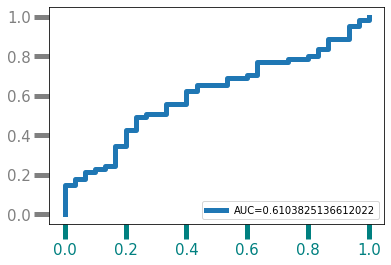

In [60]:
#Построим ROC-кривую
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#А также найдем значение площади под кривой (AUC), что характеризует качество самой модели
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show() 

In [61]:
#Построим пробит модель 2, разбив нашу выборку на train и test. Это необходимо для расчета прогнозных значений y_pred
X = data[['BCMA', 'Number of underwriters', 'Up-Front UW fee', 'IPO Proceeds, $M', "CEO's age", 'Deferred UW fee', 'Team','Age of the team','IPO Sector_Media & Entertainment']]
y = data["Merger"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = Probit(y_train,X_train)
result=model.fit(cov_type = 'HC3')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.627486
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                 Merger   No. Observations:                  211
Model:                         Probit   Df Residuals:                      202
Method:                           MLE   Df Model:                            8
Date:                Sun, 02 Apr 2023   Pseudo R-squ.:                 0.05448
Time:                        23:57:03   Log-Likelihood:                -132.40
converged:                       True   LL-Null:                       -140.03
Covariance Type:                  HC3   LLR p-value:                   0.05430
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
BCMA                                 0.4450      0.314      1.41

In [62]:
#Находим параметры модели 
params = pd.DataFrame(model.fit().params,columns={'coef'},)
params

Optimization terminated successfully.
         Current function value: 0.627486
         Iterations 5


,coef
BCMA,0.444994
Number of underwriters,0.028661
Up-Front UW fee,0.087583
"IPO Proceeds, $M",-0.000433
CEO's age,0.015486
Deferred UW fee,-0.112905
Team,-0.005141
Age of the team,-0.003080
IPO Sector_Media & Entertainment,-1.206939


In [63]:
#Посчитаем прогнозные значения 'y_pred' для Пробит-модели 
y_pred1 = model.predict(params=params, exog= X_test,linear=False)
y_pred1

array([[0.71631173],
       [0.77260843],
       [0.58779359],
       [0.47638945],
       [0.61719366],
       [0.68293463],
       [0.73890642],
       [0.71106433],
       [0.63210016],
       [0.68635201],
       [0.81551086],
       [0.51384649],
       [0.27806054],
       [0.70662486],
       [0.75835931],
       [0.57565106],
       [0.41737426],
       [0.63243603],
       [0.69426904],
       [0.6194208 ],
       [0.54525949],
       [0.61443608],
       [0.67389828],
       [0.67434247],
       [0.71811365],
       [0.6773045 ],
       [0.64744154],
       [0.66967702],
       [0.65505309],
       [0.63287683],
       [0.61663796],
       [0.55840231],
       [0.59840589],
       [0.60449495],
       [0.55681605],
       [0.48832303],
       [0.6137049 ],
       [0.58146943],
       [0.49481003],
       [0.68923145],
       [0.62466256],
       [0.65609952],
       [0.68742452],
       [0.58589116],
       [0.62984971],
       [0.60819398],
       [0.66445206],
       [0.669

In [64]:
y_pred=np.where(y_pred1 > 0.5, 1, 0)
y_pred

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [65]:
#Построим матрицу ошибок 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 2, 28],
       [ 4, 57]], dtype=int64)

In [66]:
#Рассмотрим матрицу ошибок
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(f'True Negative errors: {tn}')
print(f'False Positive errors: {fp}')
print(f'False Negative errors: {fn}')
print(f'True Positive errors: {tp}')

True Negative errors: 2
False Positive errors: 28
False Negative errors: 4
True Positive errors: 57


In [67]:
#Посчитаем все необходимые показатели точности модели  
print(f'F-мера равно: {f1_score(y_test, y_pred):.3f}' )
print(f'Precision равно: {precision_score(y_test, y_pred):.3f}' )
print(f'Recall равно: {recall_score(y_test, y_pred):.3f}' )
print(f'Accuracy равно: {accuracy_score(y_test, y_pred):.3f}' )
print(f'В среднем доля верно классифицированных моделю объектов равна: {accuracy_score(y_test, y_pred):.2f}' )

F-мера равно: 0.781
Precision равно: 0.671
Recall равно: 0.934
Accuracy равно: 0.648
В среднем доля верно классифицированных моделю объектов равна: 0.65


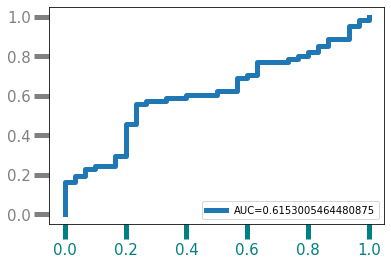

In [68]:
#Построим ROC-кривую
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred1)
auc = metrics.roc_auc_score(y_test,y_pred1)

#А также найдем значение площади под кривой (AUC), что характеризует качество самой модели
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()   


Меры точности моделей логит и пробит, так же как и доля верно предсказанных значений, в обеих моделях оказались одинаковыми, 
Однако McFadden’s R-Squared для пробит модели оказался немного выше, также как и значение AUC.
Значит, итоговая модель в исследовании - пробит2